<a href="https://colab.research.google.com/github/odontesthes/notebooks/blob/master/Parte_1_Informe_Vision_Computacional_(95_terminado)_201118_2359_FUNCIONANDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. El archivo imagenes1.zip contiene seis imágenes con los canales R, G, B separados y desalineados. 

Elija tres de ellas para recortar y separar los canales R, G, B y alinearlos para obtener una imagen a color lo más nítida posible. 

****************************
Para ello siga los siguientes pasos:

1.1. Cree una función que reciba una lista de imágenes y las visualice sin ningún procesamiento previo y utilícela para explorar las imágenes a recortar y alinear. 

Todas las imágenes deben ser desplegadas en el mismo gráfico. 
***************

1.2. Cree una función que corte cada imagen en tres para obtener los canales R, G y B y los combine para obtener una imagen a color sin utilizar técnicas para alinear los canales.

******************
1.3. Cree una función que retorne las imágenes a color alineadas lo mejor posible. Si remueve los bordes, alinear las imágenes será más sencillo. 



In [1]:
# Ejecutamos funcion para leer 3 imagenes originales desde dropbox:

! wget https://www.dropbox.com/s/7itzsfwk4gj7j2f/1.jpg
! wget https://www.dropbox.com/s/9l6xlz4z2qfl7g6/3.jpg
! wget https://www.dropbox.com/s/mrbq9r1stabs52w/2.jpg

--2018-11-21 01:23:17--  https://www.dropbox.com/s/7itzsfwk4gj7j2f/1.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7itzsfwk4gj7j2f/1.jpg [following]
--2018-11-21 01:23:17--  https://www.dropbox.com/s/raw/7itzsfwk4gj7j2f/1.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc29f1df7f10019d65fc0fa4c6b5.dl.dropboxusercontent.com/cd/0/inline/AV8lpx6lwuV2yif13m6StG46ZMzd_1OT8-ozogYH-Smy16sVK4cVmNfxXDpemP_zAwnUHr5ivVZZglXz-Y2eDK_OUjLFKkobJtfDuA89priBwKtEalj-88GQjO6zvUgELFaYXLMooucnHa4iJ87IKd0BkWN5TJ78MA13TKZe_dN3oqhEZGXdvYzgxO3Uq9Y1fx8/file [following]
--2018-11-21 01:23:18--  https://uc29f1df7f10019d65fc0fa4c6b5.dl.dropboxusercontent.com/cd/0/inline/AV8lpx6lwuV2yif13m6StG46ZMzd_1OT8-ozogYH-Smy16sVK4cVmNfxXDpemP_zAwnUHr5i

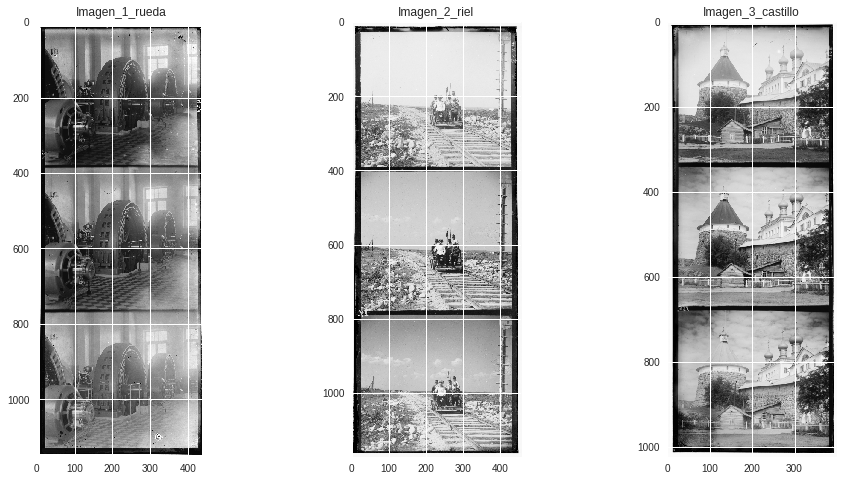

In [3]:
# Leemos las 3 imagenes y la desplegamos

import cv2
import numpy as np
import matplotlib.pyplot as plt

#Leyendo imagen de referencia

Imagen_1 = cv2.imread('1.jpg')

#Abriendo la imagen que queremos alinear

Imagen_2 = cv2.imread('2.jpg')

Imagen_3 = cv2.imread('3.jpg')

plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter

plt.close("all")
plt.figure()
ax = plt.subplot("131")
ax.set_title("Imagen_1_rueda")
ax.imshow(cv2.cvtColor(Imagen_1,cv2.COLOR_BGR2RGB))

ax = plt.subplot("132")
ax.set_title("Imagen_2_riel")
ax.imshow(cv2.cvtColor(Imagen_2, cv2.COLOR_BGR2RGB))

ax = plt.subplot("133")
ax.set_title("Imagen_3_castillo")
ax.imshow(cv2.cvtColor(Imagen_3, cv2.COLOR_BGR2RGB))

**3.0.0 Pasos Previos para imagen_1**

In [5]:
im_grey_1 =  cv2.imread("1.jpg", cv2.IMREAD_GRAYSCALE);

#Encontramos el ancho y el alto para la imagen_1
sz = im_grey_1.shape
height = int(sz[0] / 3);
width = sz[1]
    
#Creamos un arreglo de zeros para guardar la imagen final (Ojo que la altura es la tercera parte de la imagen original )

im_color_1 = np.zeros((height,width,3), dtype=np.uint8 )

#Creamos un arreglo para guardar la imagen alineada

im_aligned_1 = np.zeros((height,width,3), dtype=np.uint8 )
 
im_color_1.shape



(384, 448, 3)

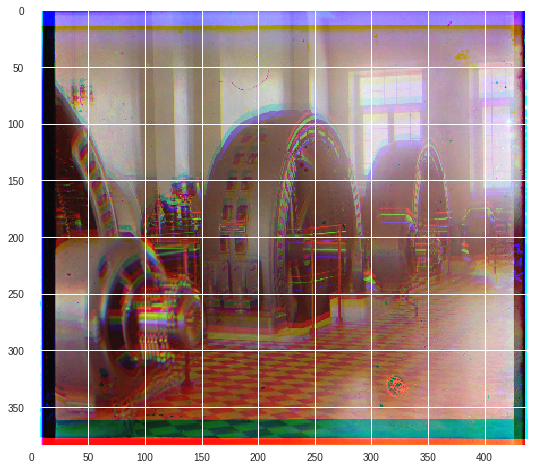

In [6]:
#Cortamos la imagen_1 en tres y creamos una imagen a color
for i in range(0,3):
    im_color_1[:,:,i] = im_grey_1[i*height:(i+1) * height,:]
im_color_1

plt.imshow(cv2.cvtColor(im_color_1, cv2.COLOR_BGR2RGB))

**3.0.2 Segundo Intento**

In [0]:
#Para imagen_1 definimos una funcion gradiente

def get_gradient(im) :
    # Calculate the x and y gradients using Sobel operator
    grad_x = cv2.Sobel(im,cv2.CV_32F,1,0,ksize=3)
    grad_y = cv2.Sobel(im,cv2.CV_32F,0,1,ksize=3)
    # Combine the two gradients
    grad = cv2.addWeighted(np.absolute(grad_x), 0.5, np.absolute(grad_y), 0.5, 0)
    return grad

In [0]:
# Para imagen_1 creamos un arreglo para guardar los gradientes

im_color_grad_1 = np.zeros((height,width,3), dtype=np.uint8 )

for i in range(0,3):
    im_color_grad_1[:,:,i]=get_gradient(im_color_1[:,:,i])


In [0]:
# Vamos a alinear
# El azul y el verde seran alineados al canal rojo
# Copiamos el canal rojo

im_aligned_1 = np.zeros((height,width,3), dtype=np.uint8 )
im_aligned_1[:,:,2] = im_color_1[:,:,2]
 
# Definimos un modelo
warp_mode = cv2.MOTION_HOMOGRAPHY #Podemos usar otra trasnformación
 
# Fijamos la matriz a la identidas
if warp_mode == cv2.MOTION_HOMOGRAPHY:
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else:
    warp_matrix = np.eye(2, 3, dtype=np.float32)

# Fijar el criterio para que el algoritmo pare
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 5000,  1e-10)

# Alinear con respecto al color rojo, usamos los gradientes
for i in range(0,2):
    (cc, warp_matrix) = cv2.findTransformECC (im_color_grad_1[:,:,2], im_color_grad_1[:,:,i], warp_matrix, warp_mode, criteria)
    if warp_mode == cv2.MOTION_HOMOGRAPHY :
        #Use Perspective warp when the transformation is a Homography
        im_aligned_1[:,:,i] = cv2.warpPerspective (im_color_1[:,:,i], warp_matrix, (width,height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    else:
        # Use Affine warp when the transformation is not a Homography
        im_aligned_1[:,:,i] = cv2.warpAffine(im_color_1[:,:,i], warp_matrix, (width, height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
     

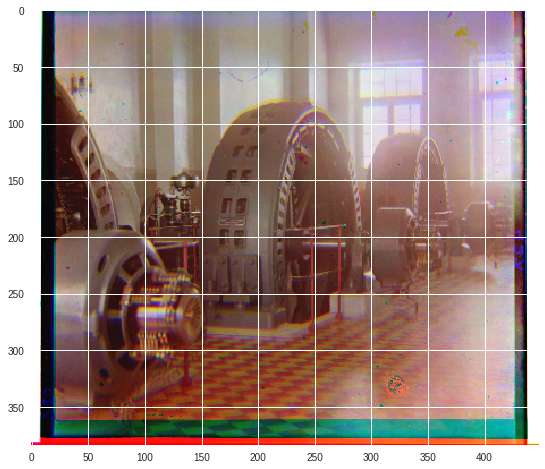

In [10]:
plt.imshow(cv2.cvtColor(im_aligned_1, cv2.COLOR_BGR2RGB))

In [11]:
## 3.0.0 Pasos Previos para imagen_2

im_grey_2 =  cv2.imread("2.jpg", cv2.IMREAD_GRAYSCALE);

#Encontramos el ancho y el alto para la imagen_2
sz = im_grey_2.shape
height = int(sz[0] / 3);
width = sz[1]
    
#Creamos un arreglo de zeros para guardar la imagen final (Ojo que la altura es la tercera parte de la imagen original )

im_color_2 = np.zeros((height,width,3), dtype=np.uint8 )

#Creamos un arreglo para guardar la imagen alineada

im_aligned_2 = np.zeros((height,width,3), dtype=np.uint8 )
 
im_color_2.shape



(391, 457, 3)

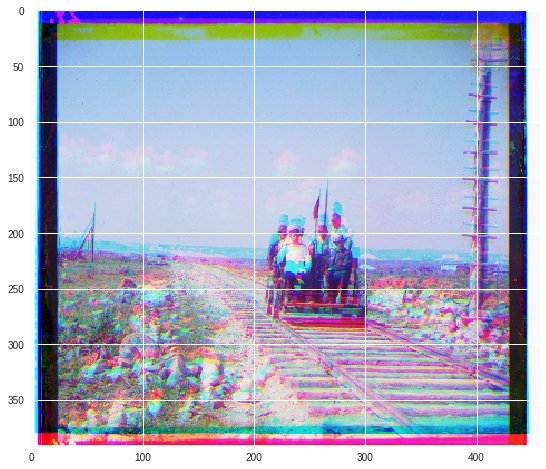

In [12]:
#Cortamos la imagen_2 en tres y creamos una imagen a color
for i in range(0,3):
    im_color_2[:,:,i] = im_grey_2[i*height:(i+1) * height,:]
im_color_2

plt.imshow(cv2.cvtColor(im_color_2, cv2.COLOR_BGR2RGB))

In [0]:
#Para imagen_2 definimos una funcion gradiente

def get_gradient(im) :
  
    # Calculate the x and y gradients using Sobel operator
    
    grad_x = cv2.Sobel(im,cv2.CV_32F,1,0,ksize=3)
    grad_y = cv2.Sobel(im,cv2.CV_32F,0,1,ksize=3)
    
    # Combine the two gradients
    grad = cv2.addWeighted(np.absolute(grad_x), 0.5, np.absolute(grad_y), 0.5, 0)
    return grad


In [0]:
# Para imagen_2 creamos un arreglo para guardar los gradientes

im_color_grad_2 = np.zeros((height,width,3), dtype=np.uint8 )

for i in range(0,3):
    im_color_grad_2[:,:,i]=get_gradient(im_color_2[:,:,i])

In [0]:

# Vamos a alinear
# El azul y el verde seran alineados al canal rojo
# Copiamos el canal rojo

im_aligned_2 = np.zeros((height,width,3), dtype=np.uint8 )
im_aligned_2[:,:,2] = im_color_2[:,:,2]
 
# Definimos un modelo
warp_mode = cv2.MOTION_HOMOGRAPHY #Podemos usar otra trasnformación
 
# Fijamos la matriz a la identidas
if warp_mode == cv2.MOTION_HOMOGRAPHY:
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else:
    warp_matrix = np.eye(2, 3, dtype=np.float32)

# Fijar el criterio para que el algoritmo pare
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 5000,  1e-10)

# Alinear con respecto al color rojo, usamos los gradientes
for i in range(0,2):
    (cc, warp_matrix) = cv2.findTransformECC (im_color_grad_2[:,:,2], im_color_grad_2[:,:,i], warp_matrix, warp_mode, criteria)
    if warp_mode == cv2.MOTION_HOMOGRAPHY :
      
        #Use Perspective warp when the transformation is a Homography
        im_aligned_2[:,:,i] = cv2.warpPerspective (im_color_2[:,:,i], warp_matrix, (width,height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    else:
      
        # Use Affine warp when the transformation is not a Homography
        im_aligned_2[:,:,i] = cv2.warpAffine(im_color_2[:,:,i], warp_matrix, (width, height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);


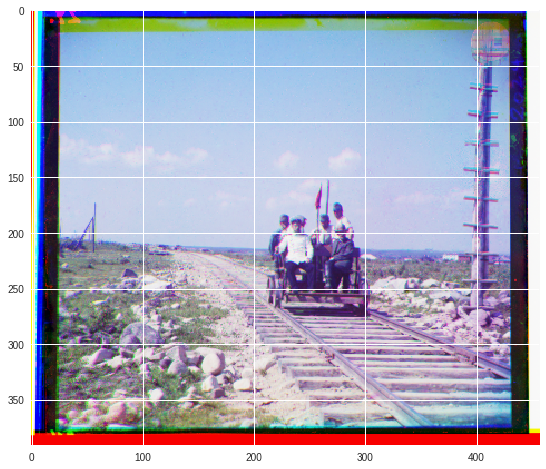

In [16]:
plt.imshow(cv2.cvtColor(im_aligned_2, cv2.COLOR_BGR2RGB))

In [17]:
###  3.0.0 Pasos Previos para imagen_3**

im_grey_3 =  cv2.imread("3.jpg", cv2.IMREAD_GRAYSCALE);

#Encontramos el ancho y el alto para la imagen_3
sz = im_grey_3.shape
height = int(sz[0] / 3);
width = sz[1]
    
#Creamos un arreglo de zeros para guardar la imagen final (Ojo que la altura es la tercera parte de la imagen original )

im_color_3 = np.zeros((height,width,3), dtype=np.uint8 )

#Creamos un arreglo para guardar la imagen alineada

im_aligned_3 = np.zeros((height,width,3), dtype=np.uint8 )
 
im_color_3.shape

(341, 398, 3)

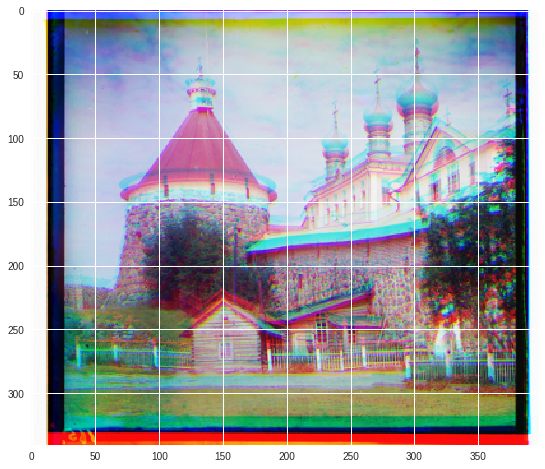

In [18]:
#Cortamos la imagen_3 en tres y creamos una imagen a color
for i in range(0,3):
    im_color_3[:,:,i] = im_grey_3[i*height:(i+1) * height,:]
im_color_3

plt.imshow(cv2.cvtColor(im_color_3, cv2.COLOR_BGR2RGB))

In [0]:

#Para imagen_3 definimos una funcion gradiente

def get_gradient(im) :
  
    # Calculate the x and y gradients using Sobel operator
    
    grad_x = cv2.Sobel(im,cv2.CV_32F,1,0,ksize=3)
    grad_y = cv2.Sobel(im,cv2.CV_32F,0,1,ksize=3)
    
    # Combine the two gradients
    grad = cv2.addWeighted(np.absolute(grad_x), 0.5, np.absolute(grad_y), 0.5, 0)
    return grad

In [0]:
# Para imagen_3 creamos un arreglo para guardar los gradientes

im_color_grad_3 = np.zeros((height,width,3), dtype=np.uint8 )

for i in range(0,3):
    im_color_grad_3[:,:,i]=get_gradient(im_color_3[:,:,i])



In [0]:
# Vamos a alinear
# El azul y el verde seran alineados al canal rojo
# Copiamos el canal rojo

im_aligned_3 = np.zeros((height,width,3), dtype=np.uint8 )
im_aligned_3[:,:,2] = im_color_3[:,:,2]
 
# Definimos un modelo
warp_mode = cv2.MOTION_HOMOGRAPHY #Podemos usar otra trasnformación
 
# Fijamos la matriz a la identidas
if warp_mode == cv2.MOTION_HOMOGRAPHY:
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else:
    warp_matrix = np.eye(2, 3, dtype=np.float32)

# Fijar el criterio para que el algoritmo pare
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 5000,  1e-10)

# Alinear con respecto al color rojo, usamos los gradientes
for i in range(0,2):
    (cc, warp_matrix) = cv2.findTransformECC (im_color_grad_3[:,:,2], im_color_grad_3[:,:,i], warp_matrix, warp_mode, criteria)
    if warp_mode == cv2.MOTION_HOMOGRAPHY :
      
        #Use Perspective warp when the transformation is a Homography
        im_aligned_3[:,:,i] = cv2.warpPerspective (im_color_3[:,:,i], warp_matrix, (width,height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    else:
      
        # Use Affine warp when the transformation is not a Homography
        im_aligned_3[:,:,i] = cv2.warpAffine(im_color_3[:,:,i], warp_matrix, (width, height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);


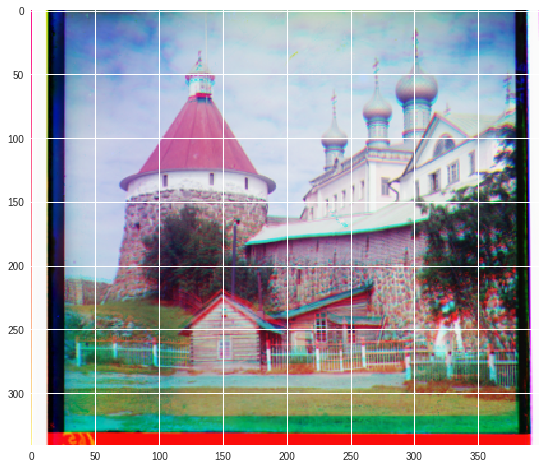

In [22]:
plt.imshow(cv2.cvtColor(im_aligned_3, cv2.COLOR_BGR2RGB))

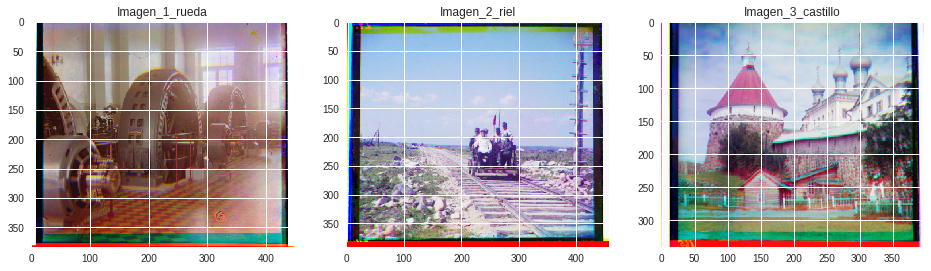

In [23]:
#Leyendo Resultados para las 3 imagenes

plt.close("all")
plt.figure()
ax = plt.subplot("131")
ax.set_title("Imagen_1_rueda")
ax.imshow(cv2.cvtColor(im_aligned_1,cv2.COLOR_BGR2RGB))

ax = plt.subplot("132")
ax.set_title("Imagen_2_riel")
ax.imshow(cv2.cvtColor(im_aligned_2, cv2.COLOR_BGR2RGB))

ax = plt.subplot("133")
ax.set_title("Imagen_3_castillo")
ax.imshow(cv2.cvtColor(im_aligned_3, cv2.COLOR_BGR2RGB))